In [1]:
import torch
import torch.nn as nn
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

from tqdm import tqdm
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Аугментация для улучшения качества обучения

In [3]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
    transforms.RandomRotation(15),
    transforms.CenterCrop(256),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),   # ImageNet значения
    transforms.RandomHorizontalFlip(0.5)
    
])

validation_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]),   # ImageNet значения
    transforms.RandomHorizontalFlip(0.5)
])

### Классификация обуви: Nike, Adidas, Converse

In [4]:
train_ds = ImageFolder("dataset/train", transform=train_transforms)
validation_ds = ImageFolder("dataset/validation", transform=validation_transforms)

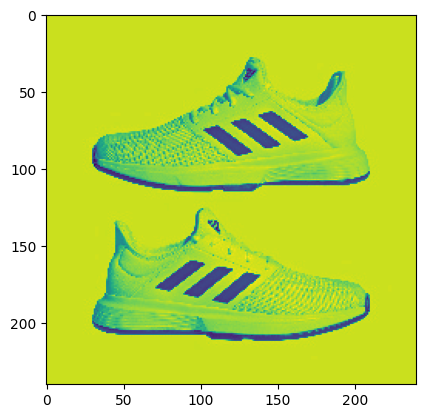

In [23]:
img, label = validation_ds[33]
img = img.numpy()[0]
plt.imshow(img)

In [6]:
batch_size = 16

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_ds, batch_size=batch_size, shuffle=True)

In [7]:
len(train_loader), len(validation_loader)

(45, 8)

In [8]:
model = tv.models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

/home/egor/develop/ai/PyTorch-Practice/ResNet_ConvolutionalNN/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/egor/develop/ai/PyTorch-Practice/ResNet_ConvolutionalNN/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [123]:
model.train()
best_accuracy = 0

for i in range(15):
    correct = 0
    total = 0
    for imgs, labels in tqdm(train_loader, desc=f"epocs [{i+1}/15]"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        
        train_loss = loss_fn(outputs, labels)
        _, predict = outputs.max(1)
        train_loss.backward()
        optimizer.step()

        total += len(labels)
        correct += predict.eq(labels).sum().item()
    print(f"train_loss: {train_loss.item()}, train_accuracy: {correct/total}")

    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for imgs, labels in tqdm(validation_loader):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            validation_loss = loss_fn(outputs, labels)

            _, predict = outputs.max(1)

            val_correct += predict.eq(labels).sum().item()
            val_total += len(labels)
            val_accuracy = val_correct/val_total
        print(f"val_loss: {validation_loss.item()}, val_accuracy: {val_accuracy},")
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            torch.save(model.state_dict(), "new_best_model.pth")
            print("BEST RESULT SAVED")


print(correct/total)

epocs [1/15]: 100%|██████████| 45/45 [00:49<00:00,  1.11s/it]


train_loss: 0.4107516407966614, train_accuracy: 0.630098452883263


100%|██████████| 8/8 [00:02<00:00,  3.33it/s]


val_loss: 1.786460280418396, val_accuracy: 0.7192982456140351,
BEST RESULT SAVED


epocs [2/15]: 100%|██████████| 45/45 [00:47<00:00,  1.05s/it]


train_loss: 0.4776764214038849, train_accuracy: 0.7932489451476793


100%|██████████| 8/8 [00:02<00:00,  3.32it/s]


val_loss: 0.40577155351638794, val_accuracy: 0.8157894736842105,
BEST RESULT SAVED


epocs [3/15]: 100%|██████████| 45/45 [00:54<00:00,  1.22s/it]


train_loss: 0.3059539794921875, train_accuracy: 0.8354430379746836


100%|██████████| 8/8 [00:02<00:00,  2.95it/s]


val_loss: 1.221442699432373, val_accuracy: 0.7982456140350878,


epocs [4/15]: 100%|██████████| 45/45 [00:59<00:00,  1.32s/it]


train_loss: 0.17637062072753906, train_accuracy: 0.8677918424753868


100%|██████████| 8/8 [00:03<00:00,  2.54it/s]


val_loss: 1.8217335939407349, val_accuracy: 0.8508771929824561,
BEST RESULT SAVED


epocs [5/15]: 100%|██████████| 45/45 [00:57<00:00,  1.27s/it]


train_loss: 0.16653504967689514, train_accuracy: 0.9043600562587905


100%|██████████| 8/8 [00:03<00:00,  2.49it/s]


val_loss: 0.5833613276481628, val_accuracy: 0.868421052631579,
BEST RESULT SAVED


epocs [6/15]: 100%|██████████| 45/45 [00:56<00:00,  1.25s/it]


train_loss: 0.01805409975349903, train_accuracy: 0.9353023909985936


100%|██████████| 8/8 [00:03<00:00,  2.28it/s]


val_loss: 0.12687264382839203, val_accuracy: 0.8508771929824561,


epocs [7/15]: 100%|██████████| 45/45 [00:58<00:00,  1.30s/it]


train_loss: 0.06660553067922592, train_accuracy: 0.9127988748241913


100%|██████████| 8/8 [00:03<00:00,  2.51it/s]


val_loss: 0.014561714604496956, val_accuracy: 0.8596491228070176,


epocs [8/15]: 100%|██████████| 45/45 [00:56<00:00,  1.27s/it]


train_loss: 1.0163716077804565, train_accuracy: 0.9240506329113924


100%|██████████| 8/8 [00:02<00:00,  2.98it/s]


val_loss: 0.2479267716407776, val_accuracy: 0.868421052631579,


epocs [9/15]: 100%|██████████| 45/45 [00:59<00:00,  1.33s/it]


train_loss: 0.7859473824501038, train_accuracy: 0.9353023909985936


100%|██████████| 8/8 [00:03<00:00,  2.35it/s]


val_loss: 0.11972057819366455, val_accuracy: 0.868421052631579,


epocs [10/15]: 100%|██████████| 45/45 [00:46<00:00,  1.02s/it]


train_loss: 0.12031764537096024, train_accuracy: 0.9212376933895922


100%|██████████| 8/8 [00:02<00:00,  3.25it/s]


val_loss: 2.9864814281463623, val_accuracy: 0.8421052631578947,


epocs [11/15]: 100%|██████████| 45/45 [00:44<00:00,  1.02it/s]


train_loss: 0.11620467156171799, train_accuracy: 0.9381153305203939


100%|██████████| 8/8 [00:02<00:00,  3.51it/s]


val_loss: 0.05596505478024483, val_accuracy: 0.868421052631579,


epocs [12/15]: 100%|██████████| 45/45 [00:44<00:00,  1.02it/s]


train_loss: 0.12465514242649078, train_accuracy: 0.9563994374120957


100%|██████████| 8/8 [00:02<00:00,  2.99it/s]


val_loss: 0.21051077544689178, val_accuracy: 0.8157894736842105,


epocs [13/15]: 100%|██████████| 45/45 [00:44<00:00,  1.01it/s]


train_loss: 0.127671480178833, train_accuracy: 0.960618846694796


100%|██████████| 8/8 [00:02<00:00,  3.33it/s]


val_loss: 1.6269283294677734, val_accuracy: 0.868421052631579,


epocs [14/15]: 100%|██████████| 45/45 [00:44<00:00,  1.01it/s]


train_loss: 0.00819678045809269, train_accuracy: 0.9662447257383966


100%|██████████| 8/8 [00:02<00:00,  3.48it/s]


val_loss: 0.07251562178134918, val_accuracy: 0.9035087719298246,
BEST RESULT SAVED


epocs [15/15]:  80%|████████  | 36/45 [00:36<00:09,  1.10s/it]

In [17]:
model.load_state_dict(torch.load("new_best_model.pth"))

val_correct = 0
val_total = 0
with torch.no_grad():
    for imgs, labels in tqdm(validation_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)

        _, predict = outputs.max(1)

        val_correct += predict.eq(labels).sum().item()
        val_total += len(labels)
        val_accuracy = val_correct/val_total
    print(f"Validation accuracy: {val_accuracy}")

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

Validation accuracy: 0.9210526315789473
